# Data ingestion

## Retrieve data from S3

In [2]:
!pip3 install pandas numpy boto3 matplotlib IPython scikit-learn 2>&1> /dev/null
!mkdir data
!mkdir cleaned

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘cleaned’: File exists


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython import display

In [4]:
import boto3
import os

key_id = os.environ.get("AWS_ACCESS_KEY_ID")
secret_key = os.environ.get("AWS_SECRET_ACCESS_KEY")
bucket_name = os.environ.get("AWS_S3_BUCKET")
s3_endpoint = os.environ.get("AWS_S3_ENDPOINT")

s3_client = boto3.client("s3", aws_access_key_id=key_id, aws_secret_access_key=secret_key, endpoint_url=s3_endpoint)

In [5]:
s3_client.download_file(bucket_name, "train.csv", "./data/train.csv")
s3_client.download_file(bucket_name, "test.csv", "./data/test.csv")

In [6]:
train_data = np.loadtxt('./data/train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('./data/test.csv', delimiter=',', skiprows=1)

In [7]:
print("Train Shape:", train_data.shape)
print("Test Shape:", test_data.shape)

Train Shape: (42000, 785)
Test Shape: (28000, 784)


In [8]:
train_data[0].max()

255.0

In [9]:
train_data[:, 1:].shape

(42000, 784)

## Split training and validation data

In [10]:
x_train = train_data[:, 1:]
y_train = train_data[:, 0]
x_test = test_data

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


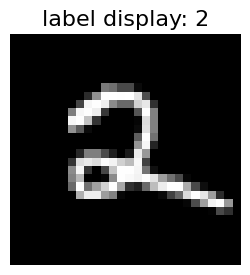

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    Image = x_train[n,:].reshape(28,28)
    ax.imshow(Image, cmap='gray')
    ax.set_title('label display: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.5)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [14]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:', x_val.shape)
print('y_val:', y_val.shape)
print('x_test:', x_test.shape)

x_train: (37800, 784)
y_train: (37800,)
x_val: (4200, 784)
y_val: (4200,)
x_test: (28000, 784)


In [15]:
x_train[0].max()

255.0

## Normalization and change type

In [16]:
#normalization (from the maximum)
x_train /= 255
x_val /= 255
x_test /= 255

#change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

check the answer 2.0


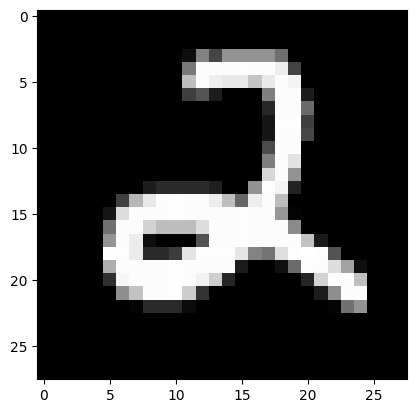

In [17]:
#show the image(x_train) and key answer (y_train)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
print("check the answer", y_train[0])

In [18]:
np.save('./cleaned/x_train.npy', x_train)
np.save('./cleaned/x_test.npy', x_test)
np.save('./cleaned/x_val.npy', x_val)
np.save('./cleaned/y_train.npy', y_train)
np.save('./cleaned/y_val.npy', y_val)

In [19]:
s3_client.upload_file('./cleaned/x_train.npy', bucket_name, "/cleaned/x_train.npy")
s3_client.upload_file('./cleaned/x_test.npy', bucket_name, "/cleaned/x_test.npy")
s3_client.upload_file('./cleaned/x_val.npy', bucket_name, "/cleaned/x_val.npy")
s3_client.upload_file('./cleaned/y_train.npy', bucket_name, "/cleaned/y_train.npy")
s3_client.upload_file('./cleaned/y_val.npy', bucket_name, "/cleaned/y_val.npy")

In [20]:
!rm -rf data
!rm -rf cleaned